### Read data related to perturbation combinations

In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import scanpy as sc

from os.path import join

# !ls -ltrh 
import utils
import pandas as pd


## Load newly generated data

In [15]:
ad = utils.get_means()

True /storage/groups/ml01/workspace/mo/for_nacho/Norman2019_prep_new.h5ad
True /storage/groups/ml01/workspace/carlo.dedonno/cpa-reproducibility/pred_real_5613.h5ad


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


True /storage/groups/ml01/workspace/carlo.dedonno/cpa-reproducibility/figure4_latent_adata.h5ad

dimensions of embedding: (497800, 64)
all good. Removing datasets based on repetition is then tractable


In [16]:
ad.obs['type'].value_counts()

predicted    5329
measured      284
Name: type, dtype: int64

In [17]:
print(ad.shape)

(5613, 5000)


In [18]:
ad.shape

(5613, 5000)

In [19]:
double_ko_list = [i for i in ad.obs['condition'].unique() if "ctrl" not in i]
unique = []
for db in double_ko_list:
    for ko in db.split("+"):
        unique.append(ko)
unique = set(unique)

In [20]:
single_ko_list = [i for i in ad.obs['condition'].unique() if "ctrl" in i]
unique_single = []
for db in single_ko_list:
    for ko in db.split("+"):
        unique_single.append(ko)
unique_single = set(unique_single)

In [21]:
len(unique_single)

106

### Calculate embedding using the means of predictions

In [22]:
sc.pp.neighbors(ad)
sc.tl.tsne(ad)
sc.tl.umap(ad)
sc.tl.leiden(ad)

         Falling back to preprocessing with `sc.pp.pca` and default params.


/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [23]:
import numpy as np

In [24]:
sc.set_figure_params(facecolor='white')

In [25]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['ps.fonttype'] = 42
rcParams['pdf.fonttype'] = 42

... storing 'type' as categorical
... storing 'a' as categorical
... storing 'b' as categorical


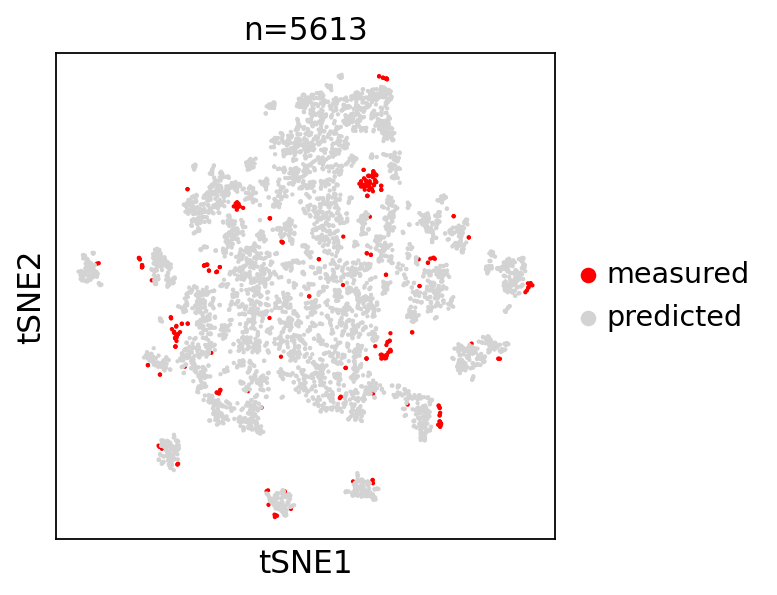

In [26]:
groups, palette = ['measured', 'predicted'], ['red', 'lightgrey']
title = 'n=%i' % ad.shape[0]
# sc.pl.umap(ad, color='type', groups=groups, palette=palette, title=title, s=15) # , frameon=False)
sc.pl.tsne(ad, color='type', groups=groups, palette=palette, title=title, s=15, show=False) # , frameon=False)
plt.savefig('../../data/figures/tnse_4g_pred_obs.pdf')
plt.show()


In [27]:
ad.obs['value'] = 1
hm = ad.obs.pivot('a', 'b', 'value').fillna(0)
annot = ad.obs.pivot('a', 'b', 'type') == 'predicted'

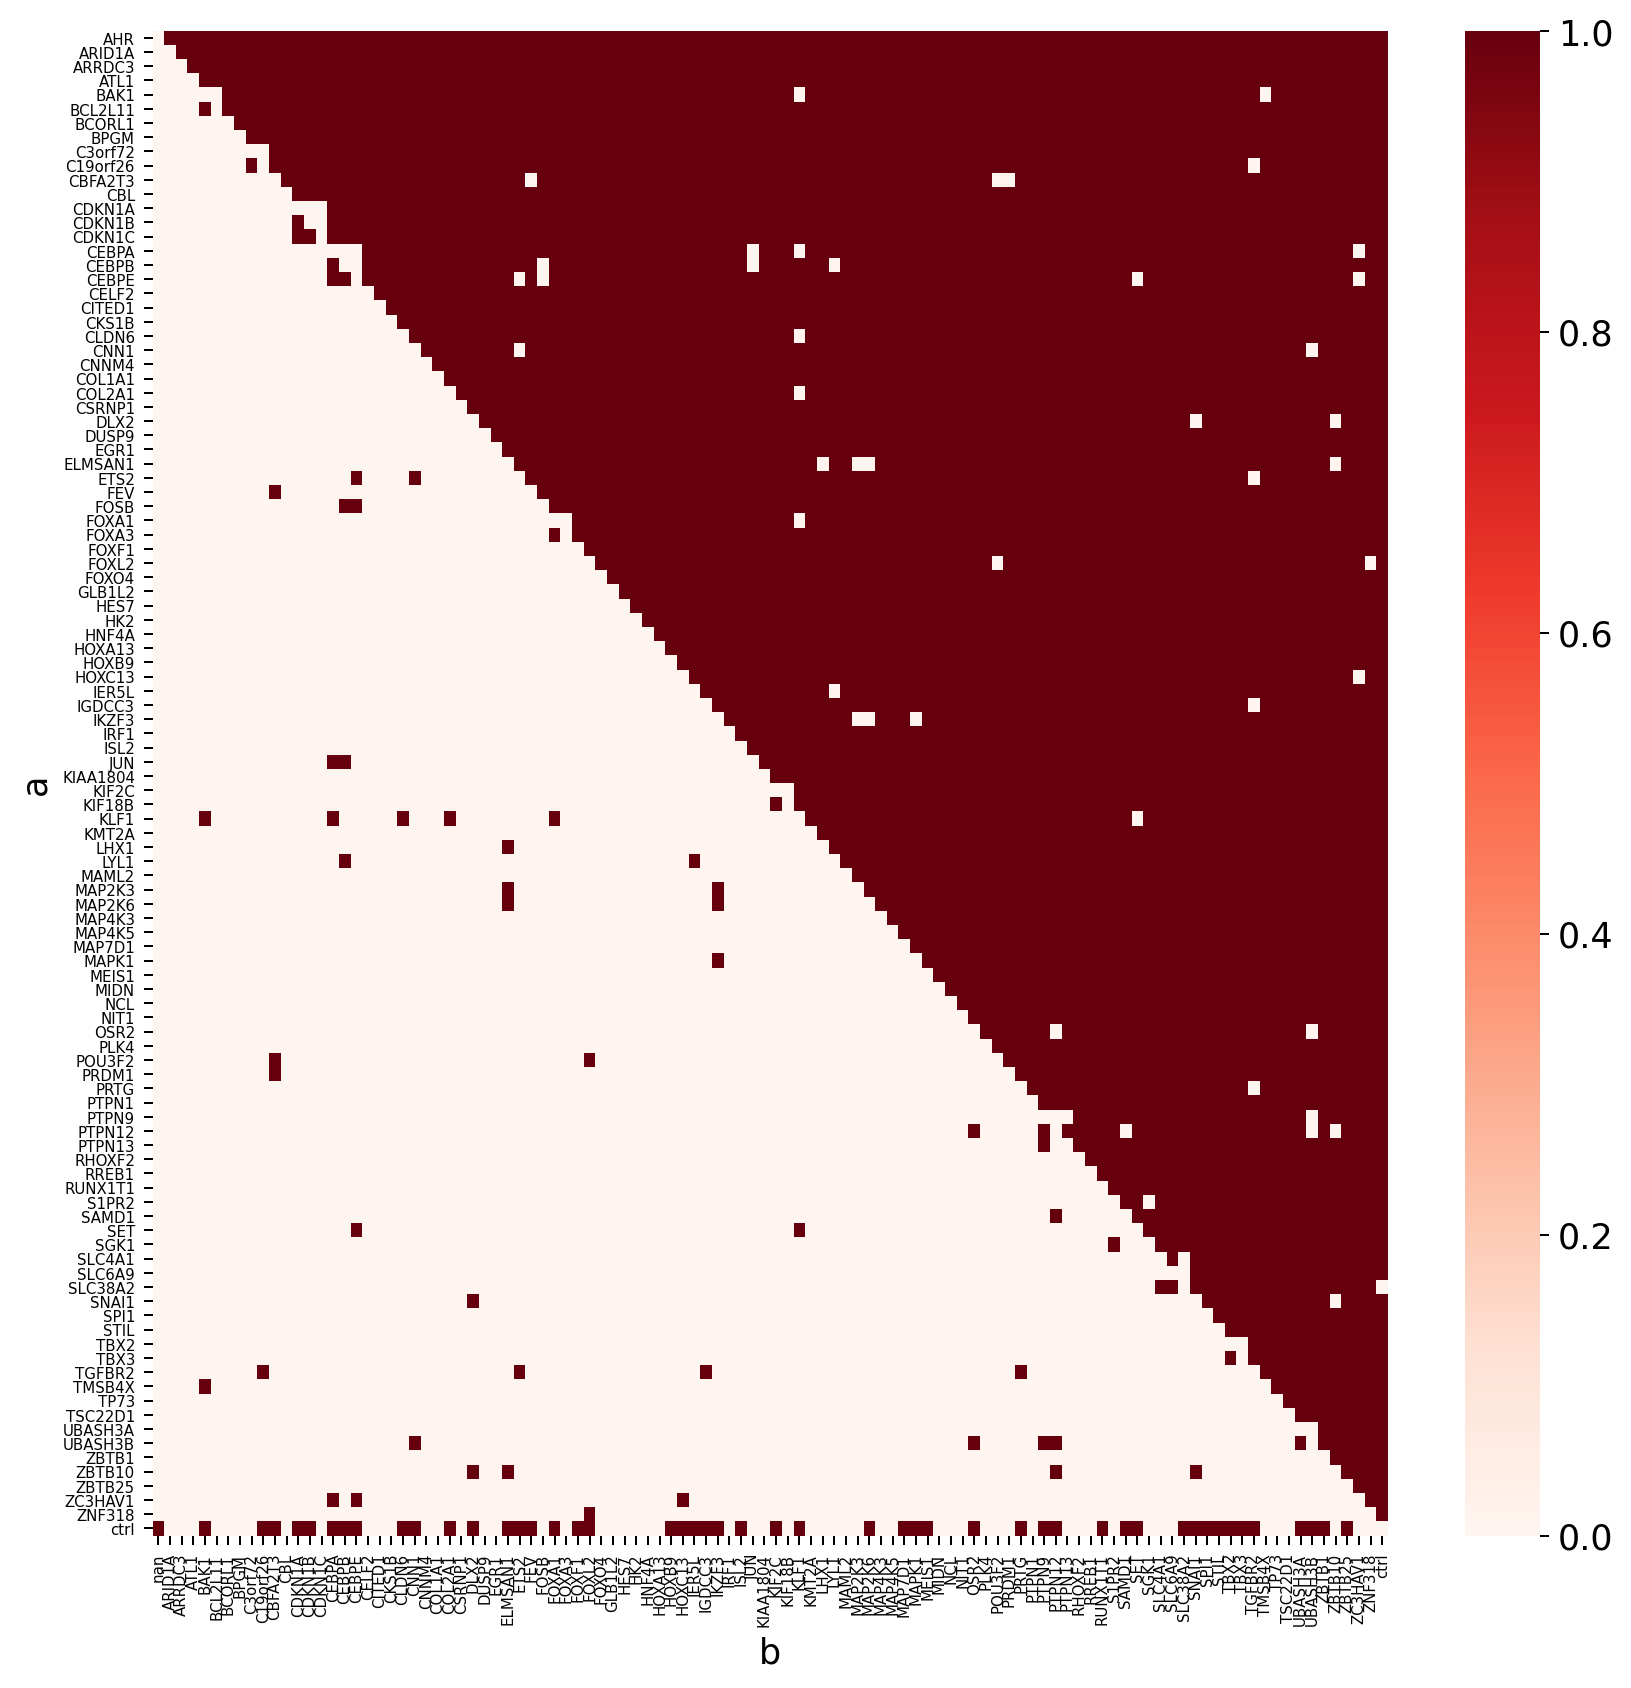

In [28]:
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 11
rcParams['figure.dpi'] = 90
sns.heatmap(hm, cmap='Reds', yticklabels=True, xticklabels=True)
            # annot=np.where(annot.astype(int) == 1, '1', ''), fmt='')
plt.yticks(fontsize=6);
plt.xticks(fontsize=6);

In [29]:
ad.obs['type'].value_counts()

predicted    5329
measured      284
Name: type, dtype: int64

In [30]:
ad.obs['has.tbx2'] = ad.obs.condition.str.contains('TBX2').astype(int)

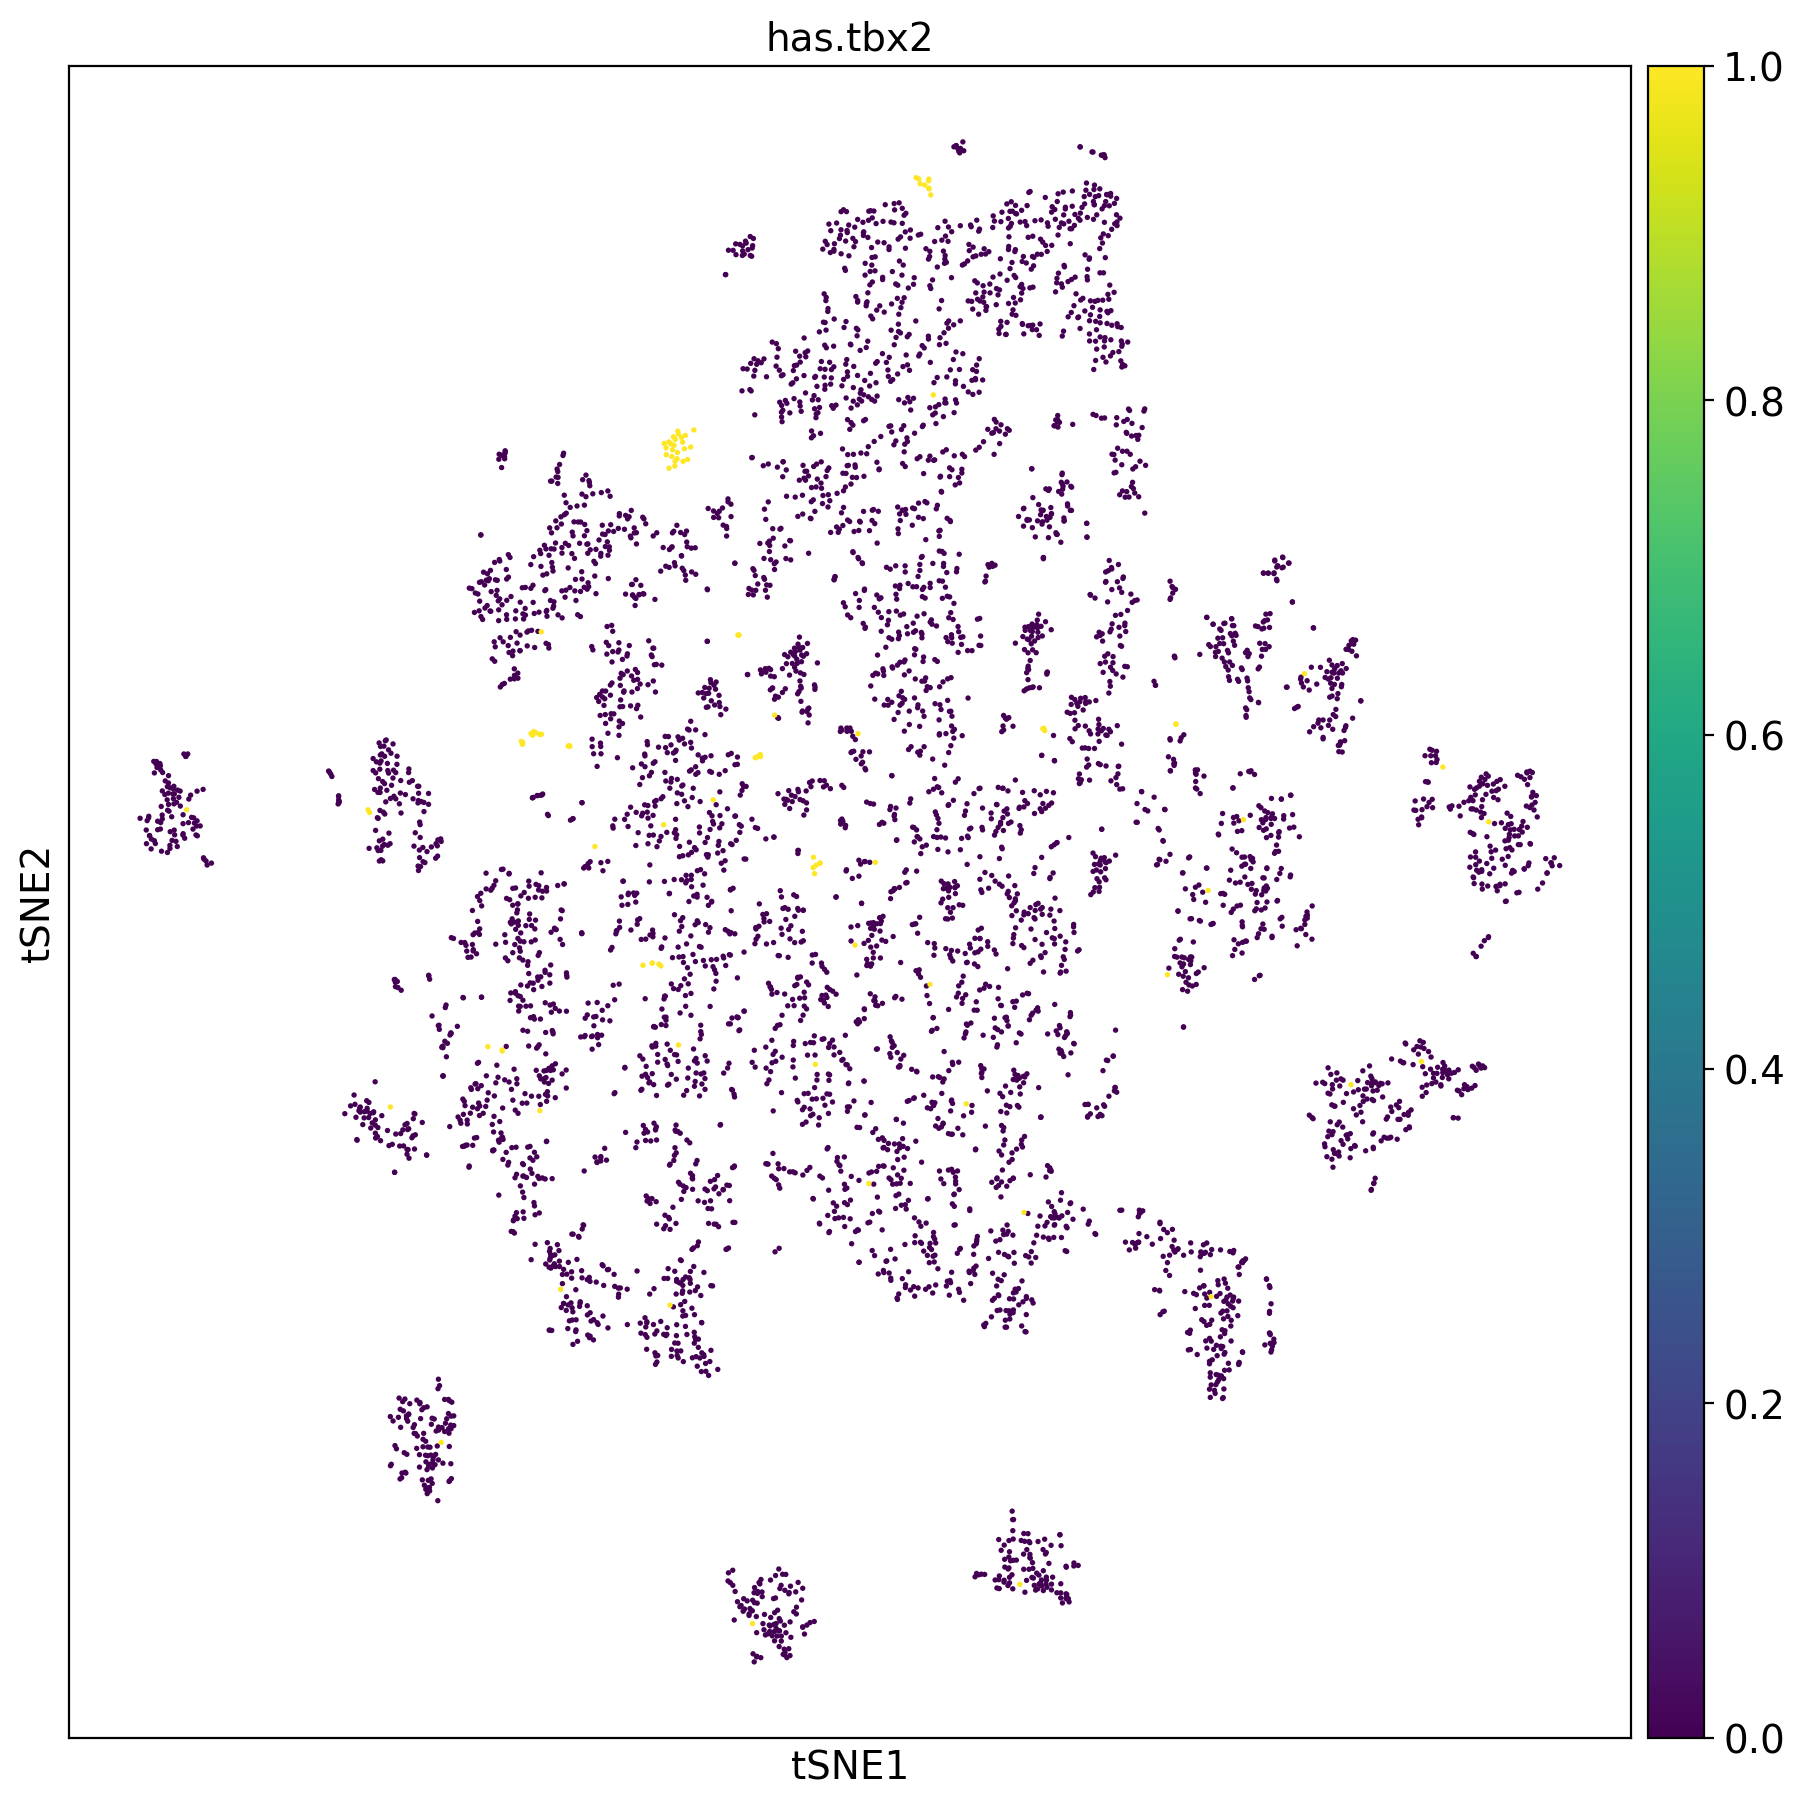

In [31]:
rcParams['figure.dpi'] = 100
sc.pl.tsne(ad, color='has.tbx2', s=15)

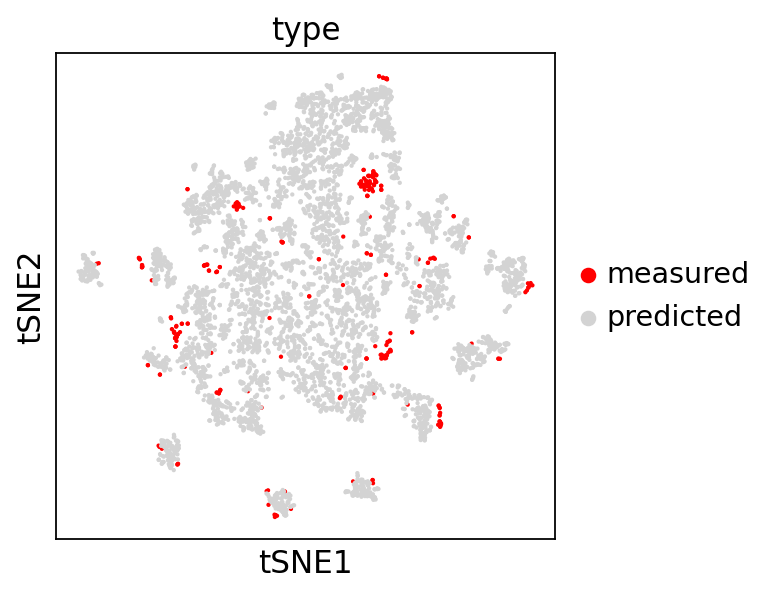

In [32]:
sc.set_figure_params(facecolor='white')
sc.pl.tsne(ad, color='type', s=15)

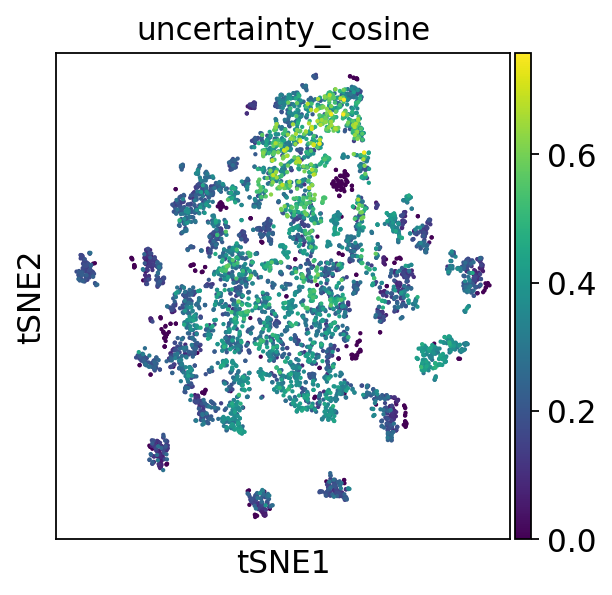

In [33]:
sc.pl.tsne(ad, color='uncertainty_cosine', s=15, show=False)
plt.savefig('../../data/figures/tnse_4g_uncertainty.pdf')
plt.show()

In [34]:
dom_gene_leiden = {}
for k, grp in ad.obs.groupby('leiden'):
    counts_by_tf = pd.Series([r[x] for x in ['a', 'b'] for ri, r in grp.iterrows()]).value_counts()
    # if counts_by_tf[0] > (sum(counts_by_tf) / 8):
    # print(counts_by_tf.index[0], k, grp.shape)
    dom_gene_leiden[k] = counts_by_tf.index[0]
ad.obs['dominant.gene'] = ad.obs['leiden'].map(dom_gene_leiden)

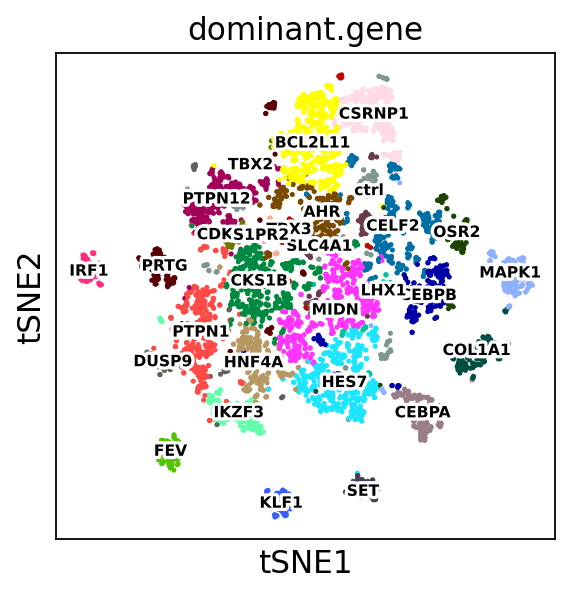

In [35]:
sc.pl.tsne(ad, color='dominant.gene', legend_loc='on data', legend_fontsize=7, legend_fontoutline=3, show=False)
plt.savefig('../../data/figures/tnse_4g_dominant_gene.pdf')
plt.show()

### One factor

In [36]:
factor_name = 'TBX2'
ad_tf = ad[ad.obs.condition.str.contains(factor_name)]

In [37]:
ad.obs['is.%s' % factor_name] = ad.obs['is.%s' % factor_name].astype('category')
ad.obs['is.%s' % factor_name].astype(int).value_counts()

0    5507
1     106
Name: is.TBX2, dtype: int64

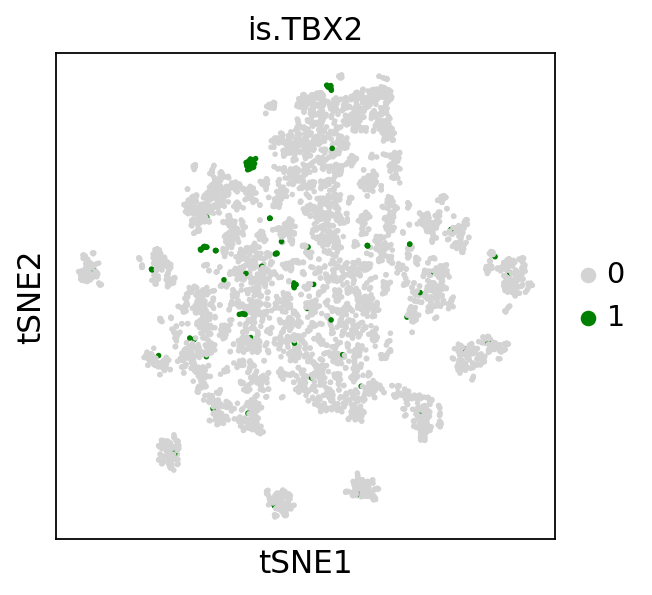

In [38]:
sc.pl.tsne(ad, color='is.%s' % factor_name, palette=['lightgrey', 'green'], s=25)

## Generate a umap for a specific factor within the embedding.

In [39]:
sc.pp.neighbors(ad_tf)
sc.tl.umap(ad_tf)
sc.tl.tsne(ad_tf)

/home/icb/ignacio.ibarra/miniconda3/envs/mypython3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [40]:
ad_tf.obs['co-factor'] = np.where(ad_tf.obs['a'] == factor_name, ad_tf.obs['b'], ad_tf.obs['a'])

In [41]:
!readlink -f ../../data/figures/fig4g_tf.pdf

/mnt/znas/icb_zstore01/groups/ml01/workspace/ignacio.ibarra/theislab/cpa-reproducibility/data/figures/fig4g_tf.pdf


... storing 'co-factor' as categorical


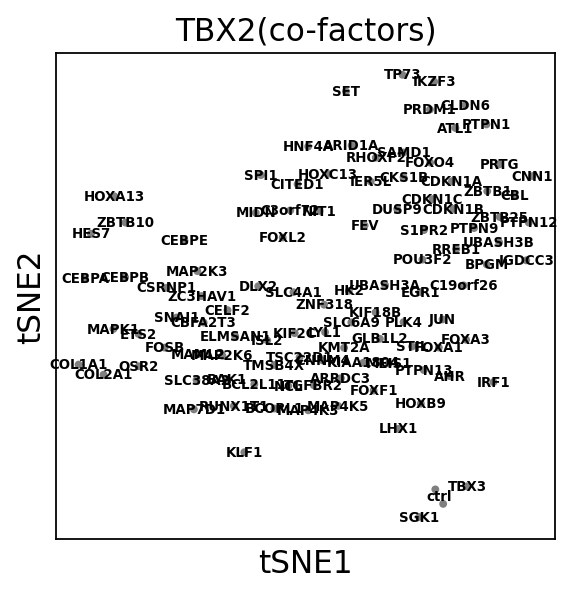

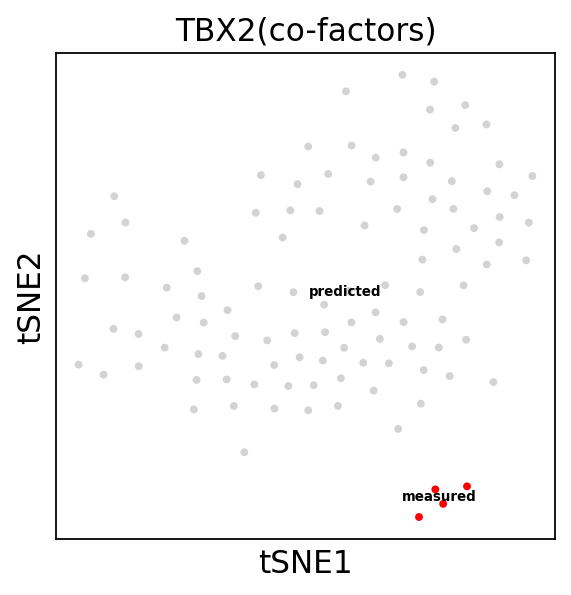

In [42]:
sc.pl.tsne(ad_tf, size=50, color=['co-factor'], title=factor_name + '(co-factors)', legend_loc='on data', legend_fontsize=6, show=False)
plt.savefig('../../data/figures/fig4g_tf.pdf')
plt.show()
sc.pl.tsne(ad_tf, size=50, color=['type'], title=factor_name + '(co-factors)', palette=['red', 'lightgrey'], legend_loc='on data', legend_fontsize=6, show=False)
plt.savefig('../../data/figures/fig4g_tf_labels.pdf')
plt.show()